In [0]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import scale
import warnings
%matplotlib inline
import sklearn_pandas
import scipy.stats as stats
import math
from scipy import stats as st
from scipy.stats import ttest_1samp
from scipy.stats import binom_test

In [0]:
#reading our dataset
df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")

In [91]:
#previewing the first five rows
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [92]:
#previewing the first five rows
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [93]:
#looking at the number of rows and columns
df.shape

(16085, 13)

In [94]:
#looking at the columns
df.columns.to_list()

['Postal code',
 'date',
 'n_daily_data_points',
 'dayOfWeek',
 'day_type',
 'BlueCars_taken_sum',
 'BlueCars_returned_sum',
 'Utilib_taken_sum',
 'Utilib_returned_sum',
 'Utilib_14_taken_sum',
 'Utilib_14_returned_sum',
 'Slots_freed_sum',
 'Slots_taken_sum']

In [0]:
#dropping columns that we wont use
df = df.drop(['utilib_taken_sum'], axis=1)
df = df.drop(['utilib_returned_sum'], axis=1)
df = df.drop(['utilib_14_taken_sum'], axis=1)
df = df.drop(['utilib_14_returned_sum'], axis=1)

In [101]:
df.columns.to_list()

['postal_code',
 'date',
 'daily_data_points',
 'day_of_week',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [98]:
#cleaning data using strip(),lower(), replace()
df.columns =df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns.to_list()

['postal_code',
 'date',
 'n_daily_data_points',
 'dayofweek',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [99]:
df.rename(columns={'n_daily_data_points':'daily_data_points'}, inplace = True)
df.rename(columns={'dayofweek':'day_of_week'}, inplace = True)
df.columns.to_list()

['postal_code',
 'date',
 'daily_data_points',
 'day_of_week',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [25]:
#looking for missing data
df.isna().sum()

postal_code              0
date                     0
daily_data_points        0
day_of_week              0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

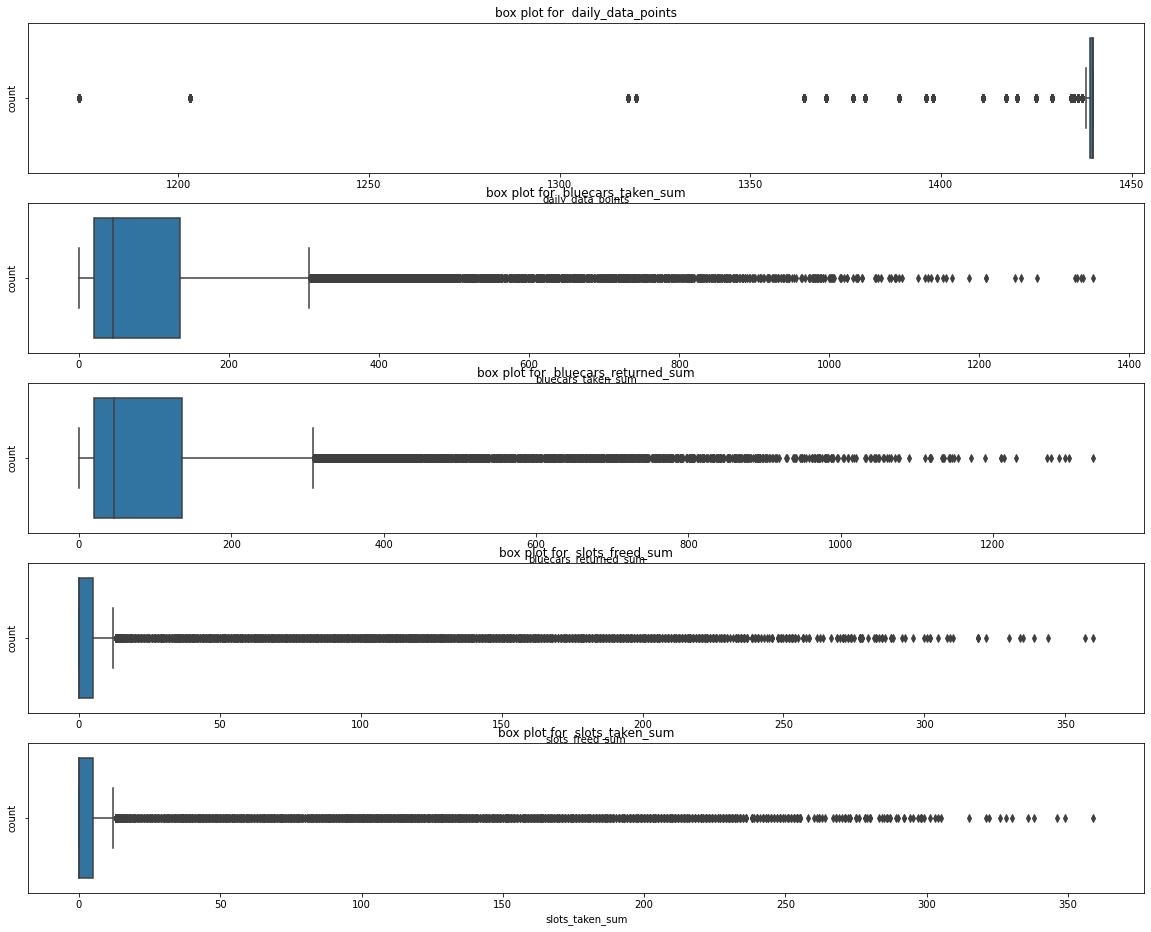

In [27]:
#checking for outliers using box plot

col_names= ['daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum']
fig, ax=plt.subplots(len(col_names), figsize=(20,16))
for i, col_val in enumerate(col_names):
  sns.boxplot(df[col_val], ax=ax[i])
  ax[i].set_title ('box plot for  '+col_val, fontsize= 12)
  ax[i].set_xlabel(col_val, fontsize= 10)
  ax[i].set_ylabel('count', fontsize= 10)
plt.show()

In [28]:
df.describe()


,postal_code,daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


In [20]:
# Creating our frequency table using value counts
df.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

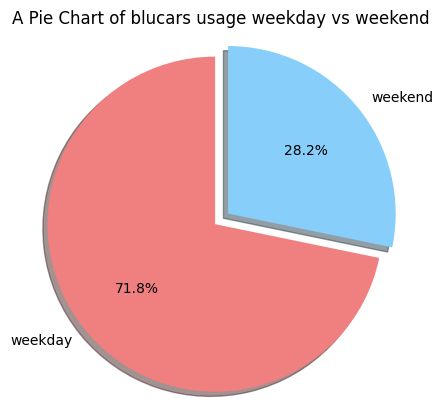

In [127]:
# comparing day type to column= df.day_type.value_counts()
column

# accessing the data to plot

# labels
sizes= column.index
sizes

# values
column_value = column.values
column_value
# Colors
colors = ['lightcoral', 'lightskyblue']
# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(column_value, labels = sizes,colors= colors, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of blucars usage weekday vs weekend')
plt.show()

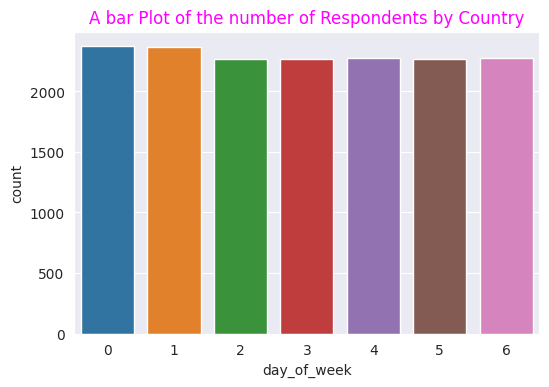

In [128]:
# Plotting a bar plot of the day ot the week 

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.day_of_week)
plt.title('A bar Plot of the number of week', color = 'magenta')
plt.show()

Text(0.5, 1.0, 'Histogram showing household size with a bank account')

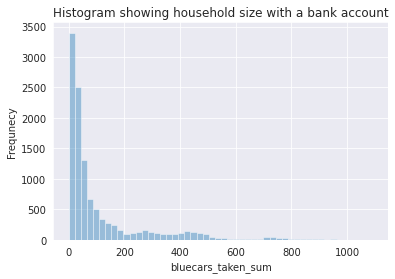

In [129]:
#Histogram to show relationship between bluecars taken on weekday
df = df[df.day_type == 'weekday']
sns.distplot(df['bluecars_taken_sum'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing bluecars taken on weekday')

In [0]:
#scatter plot
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df['bluecars_taken_sum'], df['slots_taken_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of bluecars_taken_sum vs slots_taken_sum', color = 'black')

# Labelling the x -axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y- axis
plt.ylabel('slots_taken_sum')

# We then display our scatterplot 
plt.show()

In [54]:
df.apply(lambda x : x.nunique())

postal_code              104
date                     156
daily_data_points         23
day_of_week                7
day_type                   2
bluecars_taken_sum       932
bluecars_returned_sum    929
slots_freed_sum          297
slots_taken_sum          301
dtype: int64

In [58]:
#standardize all the numerical features
num_scaled = scale (df[['daily_data_points','bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']],copy=False)
#scale takes the difference of each values from the mean and divide by standard deviation
num_scaled

array([[ 0.26103932, -0.08589624, -0.12352149, -0.01206926, -0.05042308],
       [ 0.20081834, -0.15061389, -0.17204012,  0.00711774, -0.01206806],
       [ 0.23092883,  0.06511162,  0.07055302,  0.0838657 ,  0.0838195 ],
       ...,
       [ 0.26103932, -0.50116785, -0.49010667, -0.43418308, -0.43397331],
       [ 0.26103932, -0.61981688, -0.6033168 , -0.43418308, -0.43397331],
       [-1.84669495, -0.66835512, -0.6680083 , -0.43418308, -0.43397331]])

In [62]:
df.groupby('day_type')['bluecars_taken_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekday,11544.0,116.028673,169.626905,0.0,18.0,42.0,126.0,1093.0
weekend,4541.0,151.090068,218.565642,0.0,25.0,59.0,156.0,1352.0


In [0]:
#since our points of interest are area X and area Y with postal code 75015, 75017 respectively,
# we filter the df

area_Y = df[df.postal_code == 75017]
area_Y.reset_index(inplace= True)


In [64]:
area_Y.groupby('day_type')['bluecars_taken_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekday,112.0,696.571429,84.898744,38.0,666.25,708.0,740.00,850.0
weekend,44.0,831.022727,159.843454,51.0,792.50,858.0,929.75,992.0


In [0]:


area_X = df[df.postal_code == 75015]
area_X.reset_index(inplace= True)

In [63]:
area_X.groupby('day_type')['bluecars_taken_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekday,112.0,827.883929,125.243816,49.0,756.75,826.5,894.0,1093.0
weekend,44.0,1072.772727,211.909136,58.0,1001.75,1084.5,1169.5,1352.0


In [0]:
stats.ttest_ind(a=gujarat_ages,b=maharashtra_ages,equal_var=False)


In [31]:
sample_data=df.sample(n=2,replace="False")
sample_data.shape

(2, 9)

In [0]:
#We can see that mean on area_X is 827.88 and mean on the area_Y is 696.57. Definitely we can
#see that there is difference in the means weekdays.



In [123]:
stats.levene(area_X['bluecars_taken_sum'], area_Y['bluecars_taken_sum'])



LeveneResult(statistic=19.266236308125496, pvalue=1.5612099137898675e-05)

In [0]:
diff = area_X['bluecars_taken_sum'] - area_Y['bluecars_taken_sum']

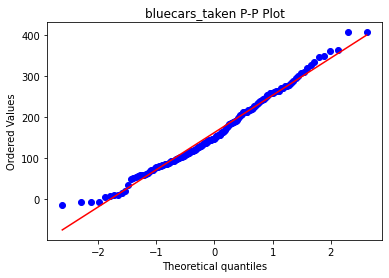

In [115]:
stats.probplot(diff, plot= plt)
plt.title('bluecars_taken P-P Plot') 
plt.savefig('bluecars_taken Residuals.png')

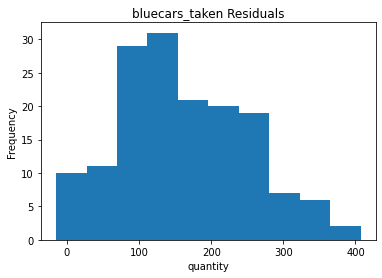

In [116]:
diff.plot(kind= "hist", title= "bluecars_taken Residuals")
plt.xlabel("quantity")
plt.savefig("Residuals Plot of bluecars_taken.png")

In [117]:
#Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed.
stats.shapiro(diff)


(0.9832109808921814, 0.055064063519239426)

In [119]:
stats.ttest_ind(area_X['bluecars_taken_sum'], area_Y['bluecars_taken_sum'])
print(p_value)
if p_value > 0.05:
  print("DO NOT REJECT THE NULL HYPOTHESIS")
else:
  print("REJECT THE NULL HYPOTHESIS")

0.05506671965122223
DO NOT REJECT THE NULL HYPOTHESIS
